<a href="https://colab.research.google.com/github/zniero1324/21370658_Programming_Assignment_ISYS5002/blob/main/2023_S2_Flu_Tracker_Kasilag_21370658.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Programming Assignment

**Due: Sunday 3rd September**

## **Problem Statement:**
During the flu season, it is crucial for healthcare organisations to accurately monitor and analyse the number of infected patients to effectively respond to potential outbreaks. To streamline this process, a software solution needs to be designed and developed that allows users to input daily reported infection numbers over the course of a week. The program should then provide key statistical insights such as the total, average, smallest, and largest of these values and a graphical representation to visualise the trend of infection counts throughout the week.


**Before you start:**

* setup the **new private repo** and **invite isys5002.itp@gmail.com** as a **collaborator** to your private GitHub repository.
* **Download** the attached .ipynb notebook and **rename** it to ***2023_S1_Flu_Tracker_[name]_[studentID]***
* Save the renamed notebook to your private GitHub repository.
* Copy and paste the **repository/notebook link** in the **ANSWER textbox on Blackboard**.

**Task:**

Following the **six-steps problem-solving methodology**, **design and implement** the solution following good programming practices, such as modularising code, validating inputs, handling errors properly, and adhering to the [PEP8](https://peps.python.org/pep-0008/) style guide.

Adhering to PEP8 standards:
* programming style naming conventions used in the PEP8, which include:
  * Meaningful names for projects, variables, methods, and controls.
  * Correct capitalisation of variables and methods
* Appropriate use of comments
* Reference any relevant forums, websites, and videos that you used.
* Use of space and indentation to the program is easy to read.

# **ANSWER**

In [ ]:
!pip install PyInputPlus
!pip install pandas

Please put no. of entries: 3
Please input the start date of the week? 01/01/2023
Please input the end date of the week? 02/02/2023
Please input the number of infected? 13
Please input the start date of the week? 03/03/2023
Please input the end date of the week? 03/03/2023
Please input the number of infected? 14
Please input the start date of the week? 05/05/2023
Please input the end date of the week? 05/05/2023
Please input the number of infected? 5


 ====  Total Statistics === 

Maximum infection per week:  14.0
Minimum infection per week:  5.0
Average infection per week:  10.67


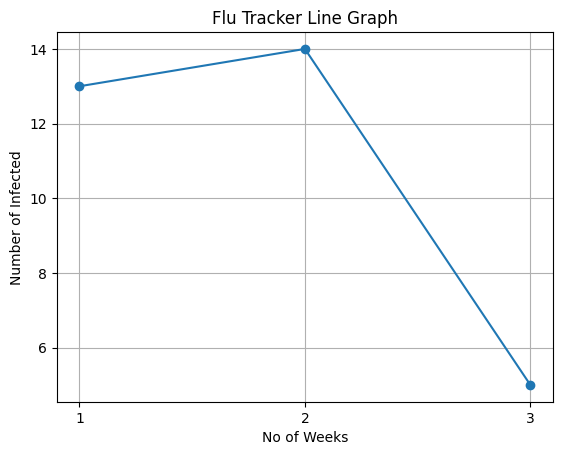

In [ ]:
import pandas as pd
import matplotlib.pyplot as pt
import pyinputplus as monitor

# Declare all variable
data_for_x = []  # List data type to contain the x-axis of the diagram.
data_for_y = []  # List data type to contain the y-axis of the diagram.
start_date_list = []  # List to contain all start date of the week we will input.
end_date_list = []  # List to contain all end date of the week we will input.
no_of_infected_per_week = []  # List to the no. of infected people.
file_path = 'data.csv'  # variable contain the name of our file.

# Determine the number of weeks user want to be input inside the csv file.
# Tips you can key in zero yo proceed to the data immediately
no_of_entries = monitor.inputInt("Please put no. of entries: ")

# Loop the number input from the no_of_entries.
for entries in range(no_of_entries):
    # Input the number the dates of the week by "dd/mm/yyyy".
    start_date = monitor.inputDate("Please input the start date of the week? ")
    end_date = monitor.inputDate("Please input the end date of the week? ")
    no_of_infected = monitor.inputFloat("Please input the number of infected? ")

    while start_date > end_date:  # Loop through if start of the week is after end of the week.
        print("Start date should be before end date \n Please try again.\n")
        start_date = monitor.inputDate("Please input the start date of the week? ")
        end_date = monitor.inputDate("Please input the end date of the week? ")

    # Insert function to insert the objects inside the list we declared.
    # `strftime` function converts datetime into string.
    start_date_list.insert(no_of_entries, start_date.strftime('%m/%d/%Y'))
    end_date_list.insert(no_of_entries, end_date.strftime('%m/%d/%Y'))
    no_of_infected_per_week.insert(no_of_entries, no_of_infected)

# Exception handler in case the File is not found in the System.
try:
    existing_df = pd.read_csv(file_path)

    # Put all the data inside our object.
    new_data = {'Start Date': start_date_list,
                'End Date': end_date_list,
                'Number of Infected Patient': no_of_infected_per_week}

    new_df = pd.DataFrame(new_data)
    combined_df = pd.concat([existing_df, new_df], ignore_index=True)  # Concatinate the data inside our file using the panda module
    combined_df.to_csv(file_path, index=False)  # Saved it inside the csv file.

except FileNotFoundError:
    data = {'Start Date': start_date_list,
            'End Date': end_date_list,
            'Number of Infected Patient': no_of_infected_per_week}

    df = pd.DataFrame(data)
    file_path = 'data.csv'
    df.to_csv(file_path, index=False)

data_frame = pd.read_csv(file_path)
week_data = data_frame['Number of Infected Patient']
week_average = round(sum(week_data) / len(week_data), 2)

for x in range(len(week_data)):
    data_for_x.insert(x, str(x + 1))
    data_for_y.insert(x, float(week_data[x]))

print('\n\n ====  Total Statistics === \n')
print('Maximum infection per week: ', week_data.max())
print('Minimum infection per week: ', week_data.min())
print('Average infection per week: ', week_average)

all_data = {'x': data_for_x,
            'y': data_for_y}

plot_df = pd.DataFrame(all_data)
pt.plot(plot_df['x'], plot_df['y'], marker='o')  # 'o' specifies markers on data points
pt.title('Flu Tracker Line Graph')
pt.xlabel('No of Weeks')
pt.ylabel('Number of Infected')
pt.grid(True)
pt.show()
